# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [41]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [42]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

In [43]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6272)              633472    
_________________________________________________________________
batch_normalization_7 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 64)       

Non-trainable params: 12,672    
* batch_normalization_9 (Batch (None, 6272)              25088       
* batch_normalization_10 (Batc (None, 14, 14, 64)        256      

= 25088 + 256 / 2


In [44]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
activation_13 (Activation)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)            

In [45]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_9 (Sequential)    (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [46]:
X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
x_train = []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (28, 28))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (19184, 28, 28)

(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)
(128, 173)
(28, 28)


(19184, 28, 28)

s:14.2087
epoch:3532  d_loss:0.0000  g_loss:14.1208
epoch:3533  d_loss:0.0000  g_loss:14.2142
epoch:3534  d_loss:0.0000  g_loss:14.2138
epoch:3535  d_loss:0.0000  g_loss:14.4560
epoch:3536  d_loss:0.0000  g_loss:14.5374
epoch:3537  d_loss:0.0000  g_loss:14.3362
epoch:3538  d_loss:0.0000  g_loss:14.4536
epoch:3539  d_loss:0.0000  g_loss:14.2844
epoch:3540  d_loss:0.0000  g_loss:14.5064
epoch:3541  d_loss:0.0000  g_loss:14.4213
epoch:3542  d_loss:0.0000  g_loss:14.6607
epoch:3543  d_loss:0.0000  g_loss:14.6754
epoch:3544  d_loss:0.0000  g_loss:14.6875
epoch:3545  d_loss:0.0000  g_loss:14.6097
epoch:3546  d_loss:0.0000  g_loss:14.3969
epoch:3547  d_loss:0.0000  g_loss:14.8588
epoch:3548  d_loss:0.0000  g_loss:14.7453
epoch:3549  d_loss:0.0000  g_loss:14.7193
epoch:3550  d_loss:0.0000  g_loss:14.7003
epoch:3551  d_loss:0.0000  g_loss:14.5644
epoch:3552  d_loss:0.0000  g_loss:14.4733
epoch:3553  d_loss:0.0000  g_loss:14.4917
epoch:3554  d_loss:0.0000  g_loss:14.5241
epoch:3555  d_loss:0.000

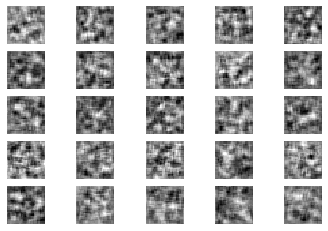

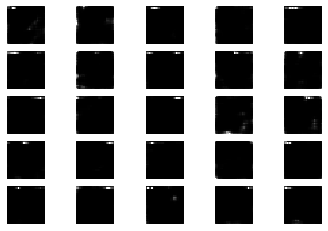

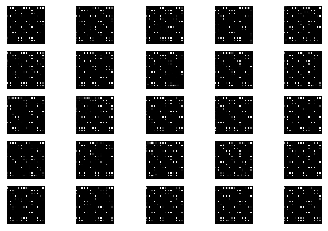

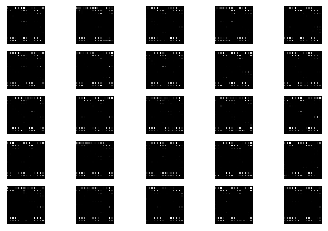

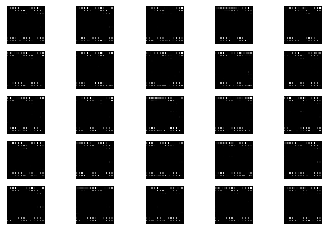

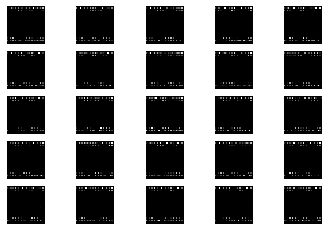

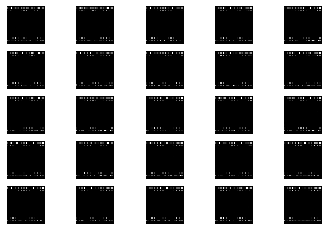

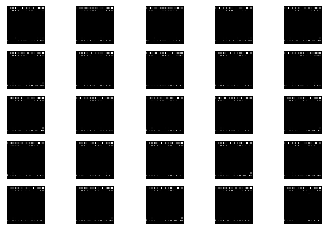

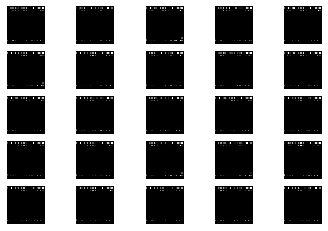

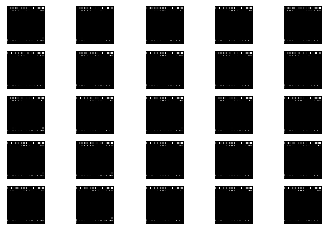

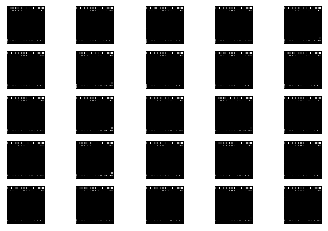

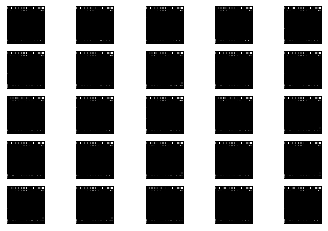

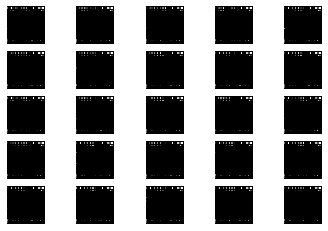

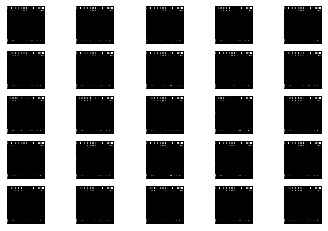

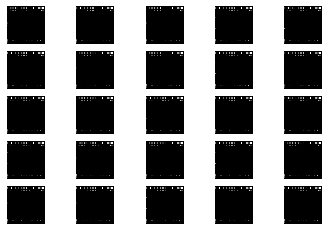

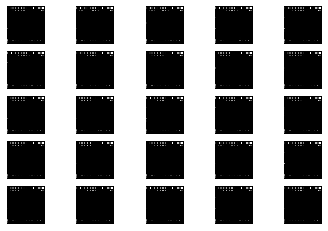

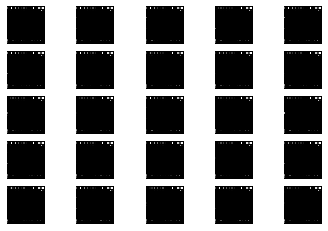

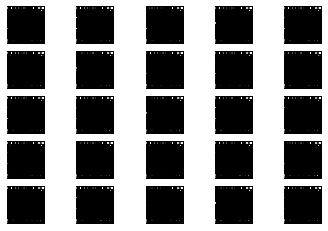

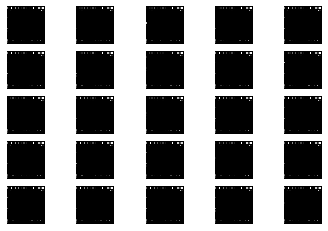

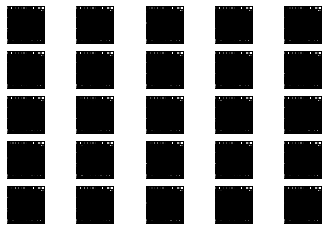

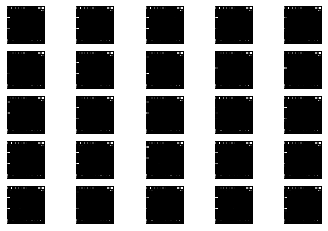

In [47]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # 데이터 불러오기
  X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  
  # print(X_train.shape)   # (200, 128, 173, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
  # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
        # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
        # print(imgs.shape)   # (32, 128, 173, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, 100))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 28, 28, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, 100))
              # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
              # print(gen_imgs.shape)   # (25, 28, 28, 1)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
              # Rescale images 0 - 1

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off') # axis를 제거한다.
                      count += 1
            # fig.savefig("E:\\nmb\\gan_image/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)

In [48]:
"""

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, 100))
              # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
              # print(gen_imgs.shape)   # (25, 28, 28, 1)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
              # Rescale images 0 - 1

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off') # axis를 제거한다.
                      count += 1
            # fig.savefig("E:\\nmb\\gan_image/gan_mnist_%d.png" % i)
  """

'\n\n        if i % saving_interval == 0:\n            # saving_interval 마다 이미지를 출력한다.\n            noise = np.random.normal(0, 1, (25, 100))\n              # print(noise.shape)  # (25, 100)\n            gen_imgs = generator.predict(noise)\n              # print(gen_imgs.shape)   # (25, 28, 28, 1)\n            \n            gen_imgs = 0.5 * gen_imgs + 0.5\n              # Rescale images 0 - 1\n\n            fig, axs = plt.subplots(5, 5)\n            count = 0\n            for j in range(5):\n                  for k in range(5):\n                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap=\'gray\')\n                      axs[j, k].axis(\'off\') # axis를 제거한다.\n                      count += 1\n            # fig.savefig("E:\\nmb\\gan_image/gan_mnist_%d.png" % i)\n  '